In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
def warp(img, original_img_pts, destination_pts):
    """
        Function that returns a warped image of a given image
    """
    
    # Define calibration box in source(original) and destination(warped/desired) image
    
    image_shape = (img.shape[1], img.shape[0])
    
    # Four source coordinates
    src = np.float32(original_img_pts)
    
    # Four desired points - eyeballing a rectangle in that same image
    dst = np.float32(destination_pts)
    
    # Compute the perspective transformation matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # We can also get the inverse perspective transform to unwarp the image 
    # using cv2.getPerspectiveTransform(dst, src)
    
    # cv2.INTER_LINEAR: How to fill in missing points as it warps an image
    # Linear interpolation
    return cv2.warpPerspective(img, M, image_shape, flags=cv2.INTER_LINEAR)

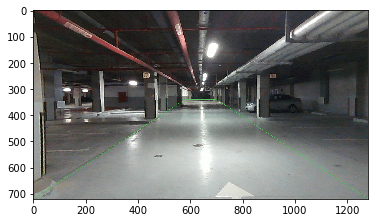

In [24]:
img = cv2.imread('perspective02.jpg')
plt.imshow(img[:,:,::-1])

In [25]:
# Points
# Top Right, Bottom Right, Bottom Left, Top Left
original_img_pts = [[400, 340], [0, 720], [1280, 720], [1000, 340]]
destination_pts = [[0, 0], [500, 720], [700, 720], [1280, 0]]
image_shape = (img.shape[1], img.shape[0])


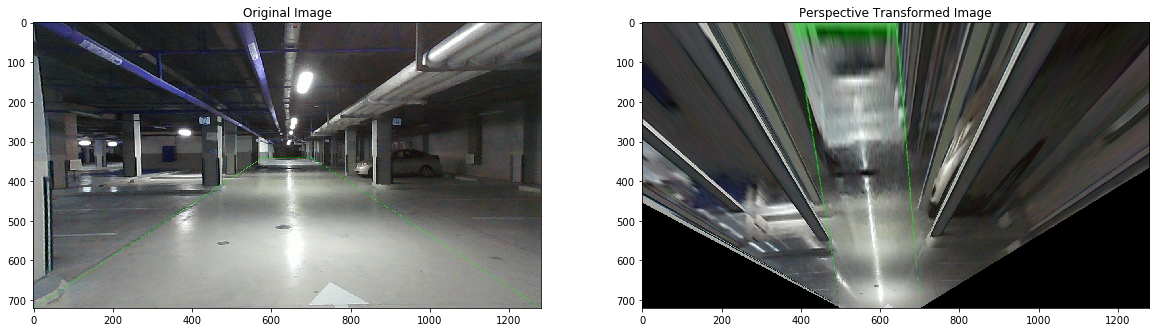

In [26]:
warped_image = warp(img, original_img_pts, destination_pts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(img);
ax1.set_title("Original Image")

ax2.imshow(warped_image)
ax2.set_title("Perspective Transformed Image")

plt.show()



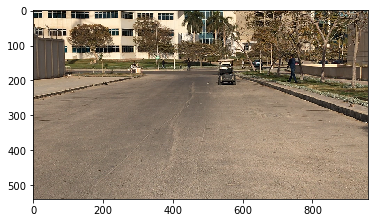

In [27]:
img = cv2.imread('perspective01.png')
plt.imshow(img[:,:,::-1])

In [40]:
# Points
# Top Right, Bottom Right, Bottom Left, Top Left
original_img_pts = [[200, 350], [0, 540], [960, 540], [800, 350]]
destination_pts = [[0, 0], [300, 540], [700, 540], [960, 0]]
image_shape = (img.shape[1], img.shape[0])


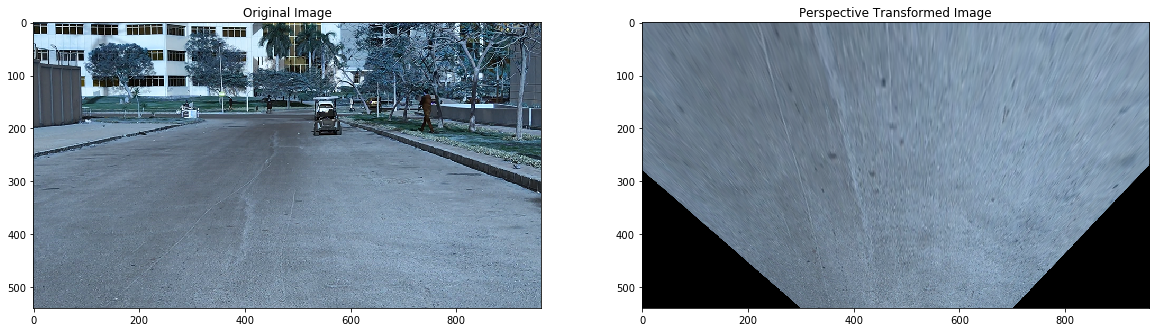

In [41]:
warped_image = warp(img, original_img_pts, destination_pts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(img);
ax1.set_title("Original Image")

ax2.imshow(warped_image)
ax2.set_title("Perspective Transformed Image")

plt.show()
